## **STEPS:**

Basic Pipeline for solving a ML project:

1. Read in Dataset

2. Get to know your dataset using data vizualisation and other techniques

3. Preprocess your dataset:

  * remove/impute null values
  * remove outliers
  * feature scaling
  * feature engineering
  * feature selection

4. train/test split
5. choose and build (number of) machine learning algorithm
5. train model on training data
6. make prediction on test data
7. evaluate performance on test data
8. visualization of your results



##**Datasets**



https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv('/content/drive/My Drive/Datasets/train.csv')
train_dataset.shape


(7352, 563)

In [ ]:
test_dataset = pd.read_csv('/content/drive/My Drive/Datasets/test.csv')


NameError: name 'pd' is not defined

## **Creating Dataframe**

In [ ]:
feature_names1 = list(train_dataset.keys())
train_frame = pd.DataFrame(train_dataset, columns=feature_names1)


feature_names2 = list(test_dataset.keys())
test_frame = pd.DataFrame(test_dataset, columns=feature_names2)
main_frame= pd.concat([train_frame, test_frame], ignore_index=True)

##**Data Analysis**

In [ ]:
main_frame.shape

(10299, 563)

In [ ]:
null=train_dataset.isnull().sum().sum()

print(f"Total number of Null values in Dataset: {null}")

Total number of Null values in Dataset: 0


In [ ]:
ac=main_frame['Activity'].unique()
for i in ac:
  print(i)

STANDING
SITTING
LAYING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS


In [ ]:
non_numeric_columns = main_frame.select_dtypes(exclude='number').columns

# Count the number of non-numeric columns
num_non_numeric_columns = len(non_numeric_columns)

print(f'The number of columns with non-numeric values is: {num_non_numeric_columns}')
print('Non-numeric columns:', non_numeric_columns)

The number of columns with non-numeric values is: 1
Non-numeric columns: Index(['Activity'], dtype='object')


In [ ]:
main_frame.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327317,-0.022256,-0.149144,-0.248645,0.133229,-0.179547,-0.306979,0.113994,-0.159712,-0.114953,...,-0.422166,-0.438911,-0.710035,0.121018,-0.023408,-0.769477,0.256167,0.038575,1,WALKING
96,0.349059,-0.022004,-0.150052,-0.303125,0.152607,-0.174298,-0.356618,0.106512,-0.141309,-0.178067,...,-0.493845,-0.538717,0.833201,0.457682,0.211527,-0.776736,0.251406,0.036180,1,WALKING
97,0.264682,-0.008592,-0.102974,-0.363238,0.036867,-0.244159,-0.425625,-0.055041,-0.243230,-0.278328,...,-0.569276,0.460655,0.765162,0.424757,0.167463,-0.786963,0.244471,0.034677,1,WALKING
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442,1,WALKING


##**Pre-Processing**

Null Values: (As Dataset didn't have any null values to begin with, we are inserting null values for demonstration purposes)

In [ ]:


np.random.seed(42)

# Insert 30 random null values (excluding 'Activity' and 'subject' columns)
for _ in range(30):
    random_row_index = np.random.randint(0, len(main_frame))
    random_column = np.random.choice(main_frame.columns[~main_frame.columns.isin(['Activity', 'subject'])])
    main_frame.at[random_row_index, random_column] = np.nan

# Display the number of null values
total_null_values = main_frame.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null_values}")

# Replace null values based on the average value for the corresponding 'Activity'
for activity in main_frame['Activity'].unique():
    activity_rows = main_frame[main_frame['Activity'] == activity]
    for column in main_frame.columns[~main_frame.columns.isin(['Activity', 'subject'])]:
        column_avg = activity_rows[column].mean()
        main_frame.loc[activity_rows.index, column] = activity_rows[column].fillna(column_avg)

# Verify that there are no null values after replacement
total_null_values_after_replace = main_frame.isnull().sum().sum()
print(f"Total number of null values in the dataset after replacement: {total_null_values_after_replace}")


Total number of null values in the dataset: 30
Total number of null values in the dataset after replacement: 0


Categorical Value Encoding:

Since dataset didn't have any categorical values to encode, the subject column has been categorized for demonstration

In [ ]:
main_frame['subject'] = 'subject_' + main_frame['subject'].astype(str)
main_frame['subject'].unique()

array(['subject_1', 'subject_3', 'subject_5', 'subject_6', 'subject_7',
       'subject_8', 'subject_11', 'subject_14', 'subject_15',
       'subject_16', 'subject_17', 'subject_19', 'subject_21',
       'subject_22', 'subject_23', 'subject_25', 'subject_26',
       'subject_27', 'subject_28', 'subject_29', 'subject_30',
       'subject_2', 'subject_4', 'subject_9', 'subject_10', 'subject_12',
       'subject_13', 'subject_18', 'subject_20', 'subject_24'],
      dtype=object)

Categorical Value, Solution 1: Encoding

In [ ]:
main_frame['subject'] = main_frame['subject'].str.extract('(\d+)').astype(int)
main_frame['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30,  2,  4,  9, 10, 12, 13, 18, 20, 24])

Categorical Value, Solution 2: Dropping the column

In [ ]:
main_frame.drop('subject', axis=1, inplace=True)

##**Feature Scaling:**
Was not required

##**Seperating Trainning Data and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

X = main_frame.drop('Activity', axis=1)
Y = main_frame['Activity']



# 70/30 split for training and testing data
train_set, test_set = train_test_split(main_frame, test_size=0.3, random_state=42,stratify=Y)


X_train = train_set.drop('Activity', axis=1)
Y_train = train_set['Activity']


X_test = test_set.drop('Activity', axis=1)
Y_test = test_set['Activity']


##**Data Visualization**

Correlation Heatmap of the entire Dataset:

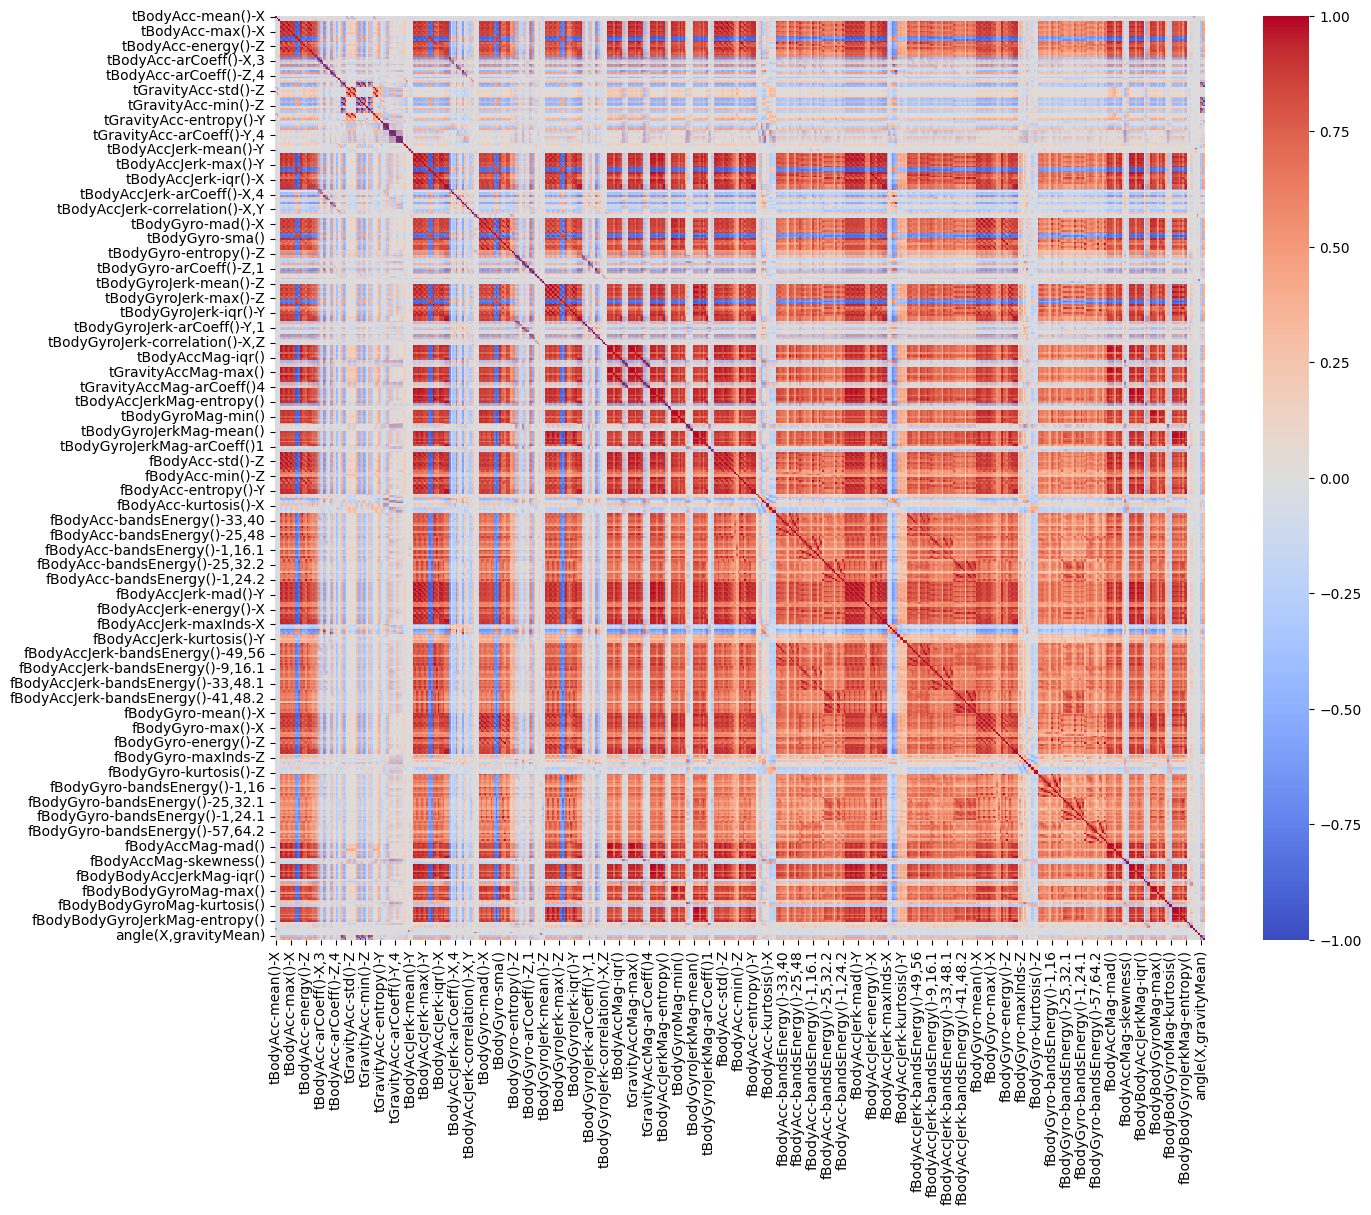

In [ ]:
target_feature = 'Activity'


selected_columns = main_frame.columns[main_frame.columns != target_feature]


sampled_data = main_frame.groupby(target_feature, group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))


correlation_matrix = sampled_data[selected_columns].corr(numeric_only=True)

plt.figure(figsize=(15, 12))


sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)


plt.show()

Correlation heatmap of 20 random features to understand the relations:

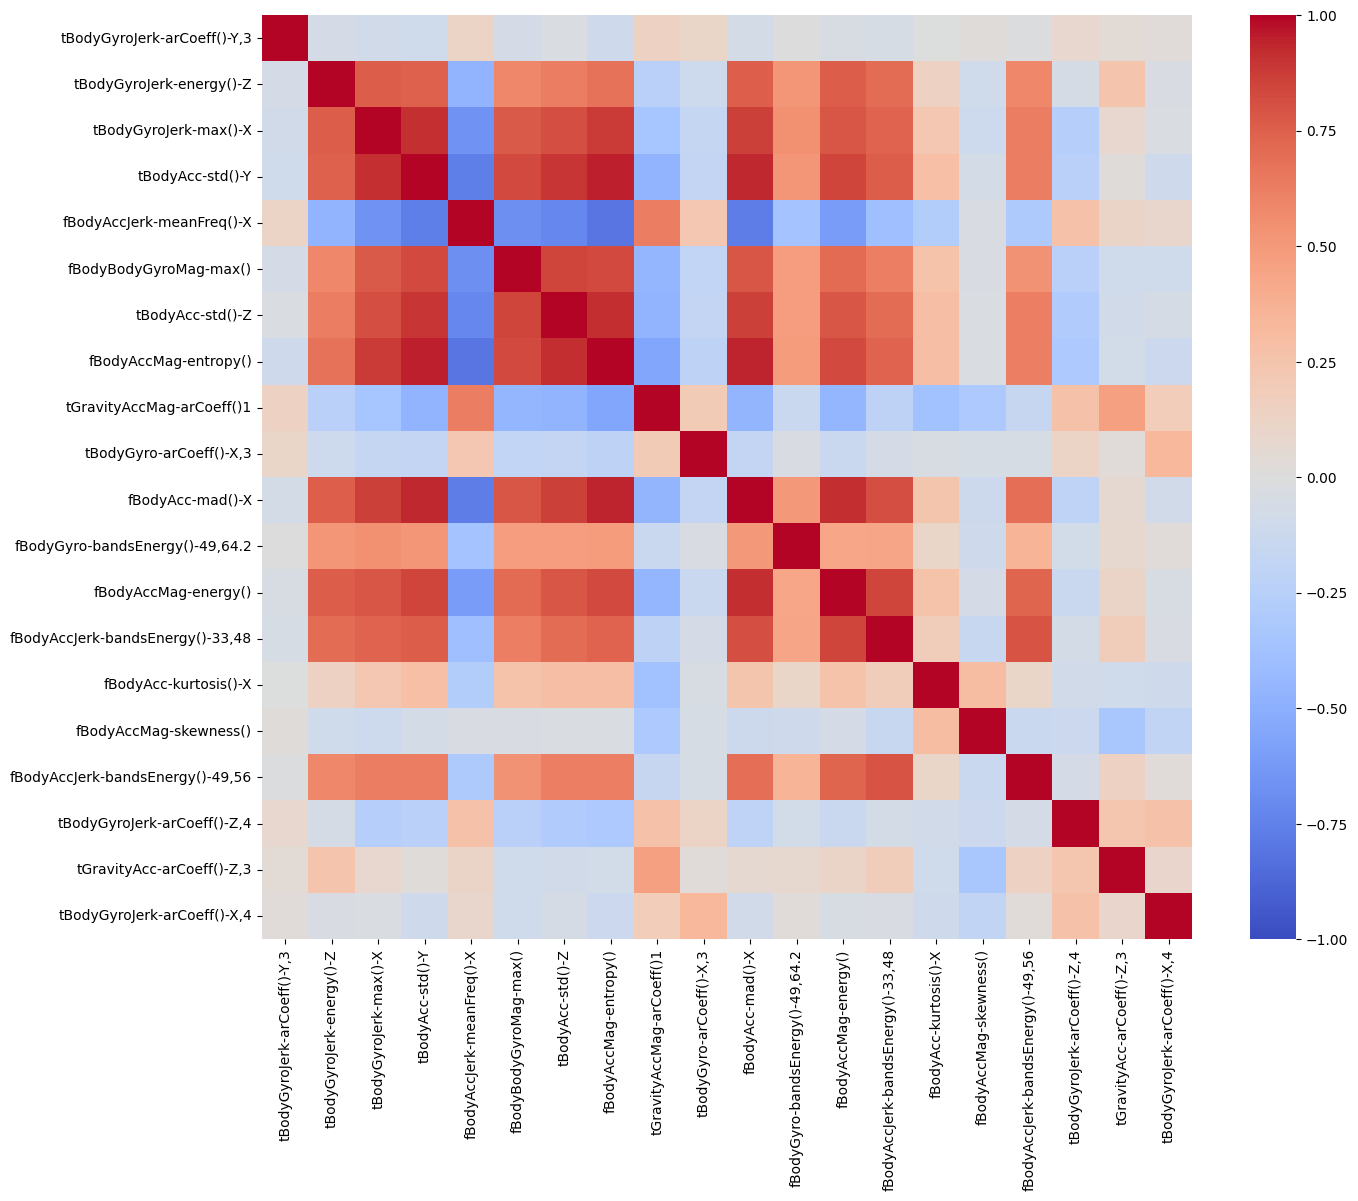

In [ ]:

import random

target_feature = 'Activity'

selected_columns = main_frame.columns[main_frame.columns != target_feature]


random_columns = random.sample(selected_columns.tolist(), 20)

sampled_data = main_frame.groupby(target_feature, group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))


correlation_matrix = sampled_data[random_columns].corr(numeric_only=True)

plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)

plt.show()

Data Distribution of Trainning Set:

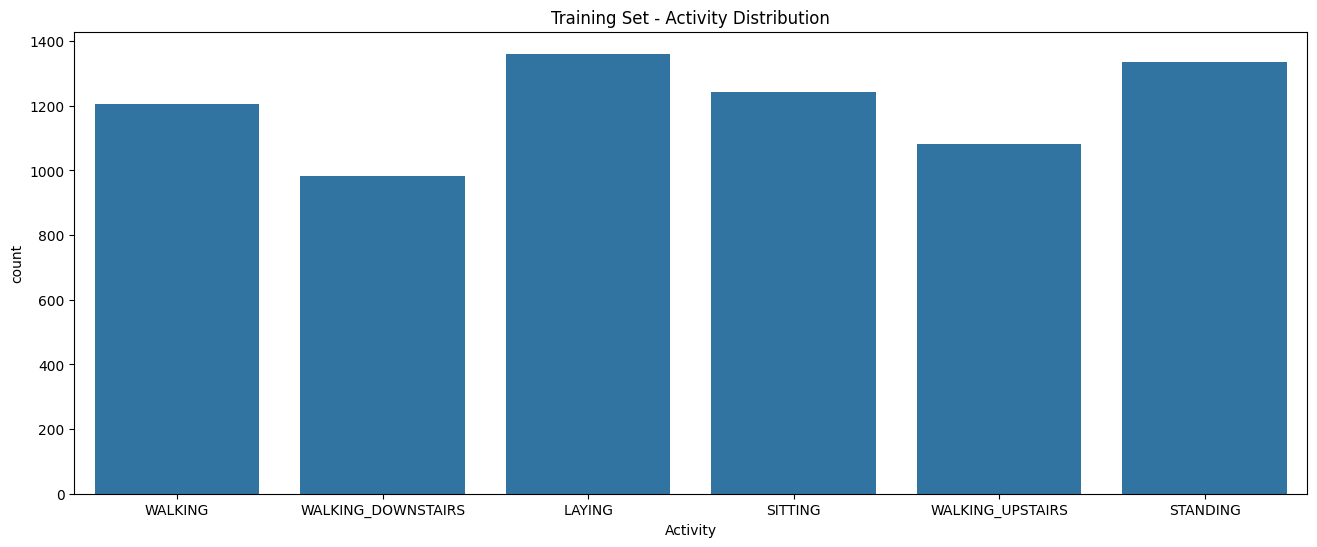

In [ ]:
plt.figure(figsize=(35, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Activity', data=train_set)
plt.title('Training Set - Activity Distribution')
plt.show()

Data Distribution of Test Set:

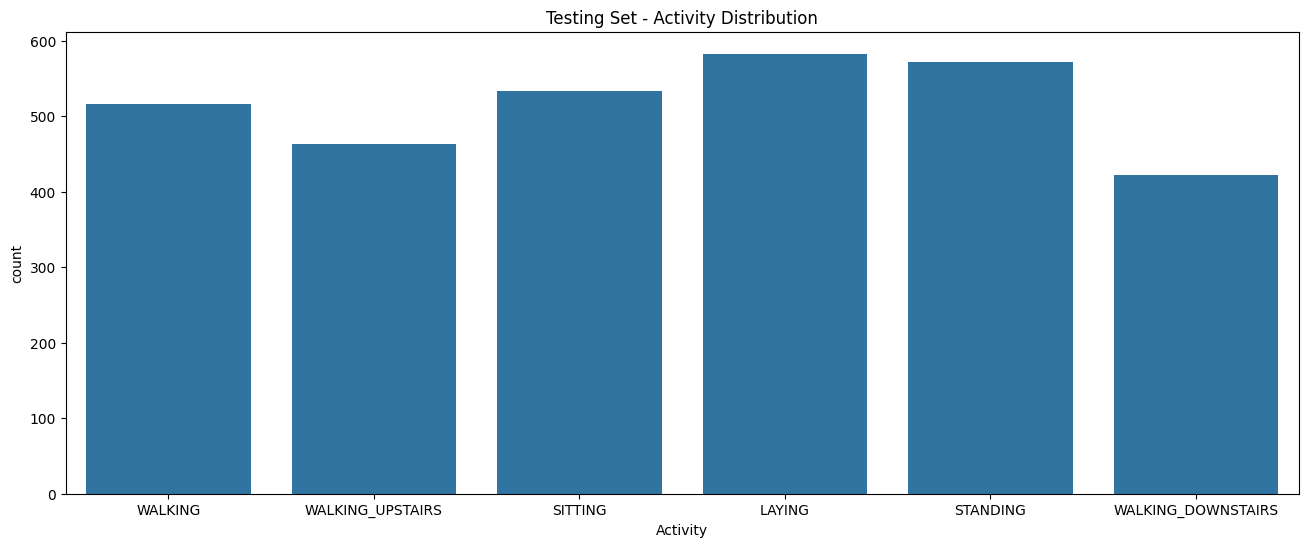

In [ ]:
plt.figure(figsize=(35, 6))
plt.subplot(1, 2, 2)
sns.countplot(x='Activity', data=test_set)
plt.title('Testing Set - Activity Distribution')
plt.show()

## **Trainning and Prediction Accuracy:**

##**Model 1: Decision Tree (RandomForestClassifier)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, Y_train)



Y_pred = model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(Y_test, Y_pred))

Accuracy: 0.97
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       583
           SITTING       0.95      0.95      0.95       533
          STANDING       0.96      0.95      0.96       572
           WALKING       0.99      0.98      0.98       517
WALKING_DOWNSTAIRS       0.97      0.99      0.98       422
  WALKING_UPSTAIRS       0.97      0.97      0.97       463

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



Visualization:

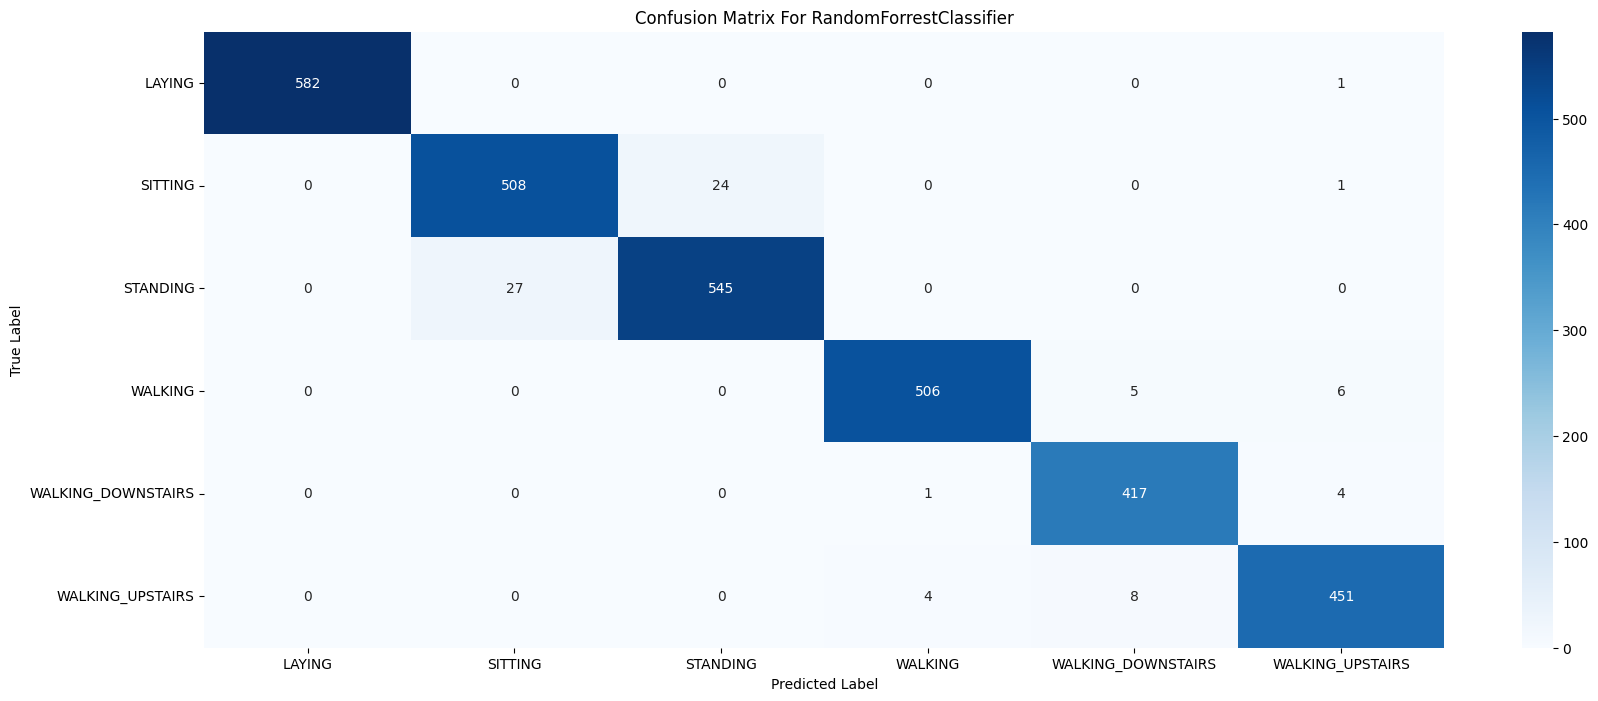

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(20, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix For RandomForrestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

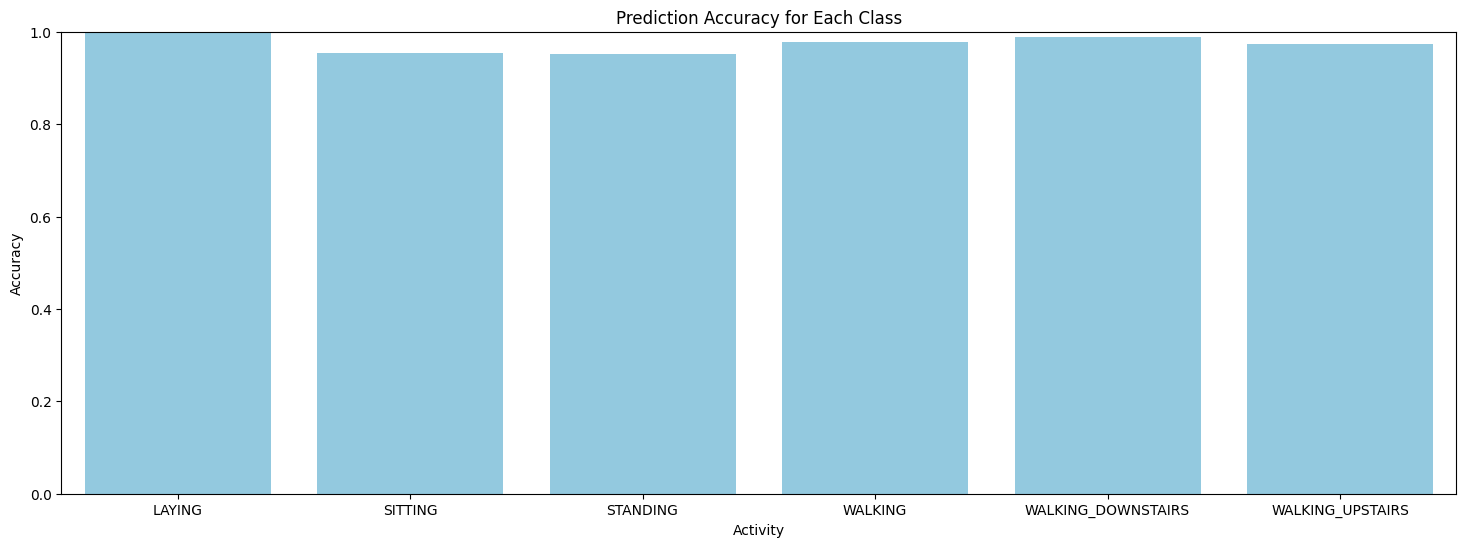

In [ ]:
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)


plt.figure(figsize=(18, 6))
sns.barplot(x=model.classes_, y=class_accuracy, color='skyblue')
plt.title('Prediction Accuracy for Each Class')
plt.xlabel('Activity')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

##**Model 2: K-Nearest Neighbors (KNeighborsClassifier)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, Y_train)


Y_pred_knn = knn_model.predict(X_test)


accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')


print('Classification Report for K-Nearest Neighbors:')
print(classification_report(Y_test, Y_pred_knn))


K-Nearest Neighbors Accuracy: 0.96
Classification Report for K-Nearest Neighbors:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       583
           SITTING       0.91      0.90      0.91       533
          STANDING       0.91      0.92      0.92       572
           WALKING       0.99      1.00      0.99       517
WALKING_DOWNSTAIRS       1.00      0.98      0.99       422
  WALKING_UPSTAIRS       0.99      1.00      0.99       463

          accuracy                           0.96      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.96      0.96      0.96      3090



Visualization:

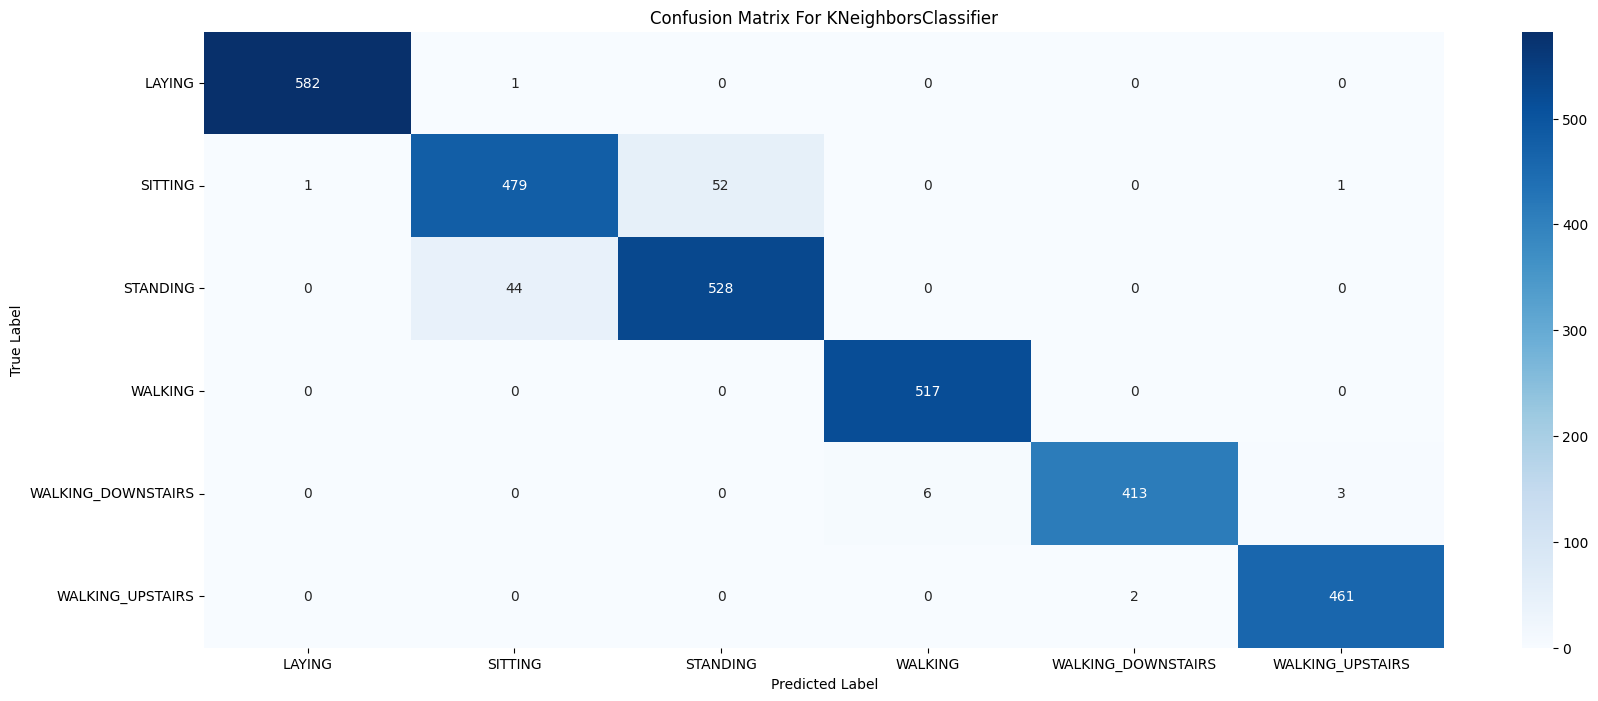

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_knn)


plt.figure(figsize=(20, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix For KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
class_accuracy_knn = conf_matrix.diagonal() / conf_matrix.sum(axis=1)


plt.figure(figsize=(18, 6))
sns.barplot(x=knn_model.classes_, y=class_accuracy_knn, color='lightcoral')
plt.title('K-Nearest Neighbors - Prediction Accuracy for Each Class')
plt.xlabel('Activity')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  age
plt.show()

SyntaxError: invalid syntax (<ipython-input-25-c90ea70e09ab>, line 9)

##**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear', C=1.0)


svm_model.fit(X_train, Y_train)

Y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.2f}')


print('Classification Report for Support Vector Machine:')
print(classification_report(Y_test, Y_pred_svm))


Visualization:

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_svm)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix FOR SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
class_accuracy_knn = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Create a bar chart
plt.figure(figsize=(18, 6))
sns.barplot(x=knn_model.classes_, y=class_accuracy_knn, color='lightgreen')
plt.title('Support Vector Machine - Prediction Accuracy for Each Class')
plt.xlabel('Activity')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()